# Исследование рынка общественного питания на основе открытых данных

## Цель проекта

Исследовать вопрос - будет ли успешным и популярным на долгое время кафе, в
котором гостей обслуживают роботы-официанты. По результатам анализа подготовить
презентацию для инвесторов с рекомендациями

## Описание данных

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

## Шаг №1. Загрузка данных и подготовка к анализу
Загрузим данные о заведениях общественного питания Москвы. Убедимся, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
# загрузим данные
pth1 = 'rest_data.csv'
pth2 = '/datasets/rest_data.csv'

if os.path.exists(pth1):
    rest_data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    rest_data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [6]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [7]:
rest_data.duplicated().sum()

0

In [8]:
rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

82

In [9]:
rest_data.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'],inplace=True)

In [10]:
rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

0

## Шаг №2. Анализ данных
- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
- Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
- Для какого вида объекта общественного питания характерно сетевое распространение?
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
- Выделите в отдельный столбец информацию об улице из столбца address .
- Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
- Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

#### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

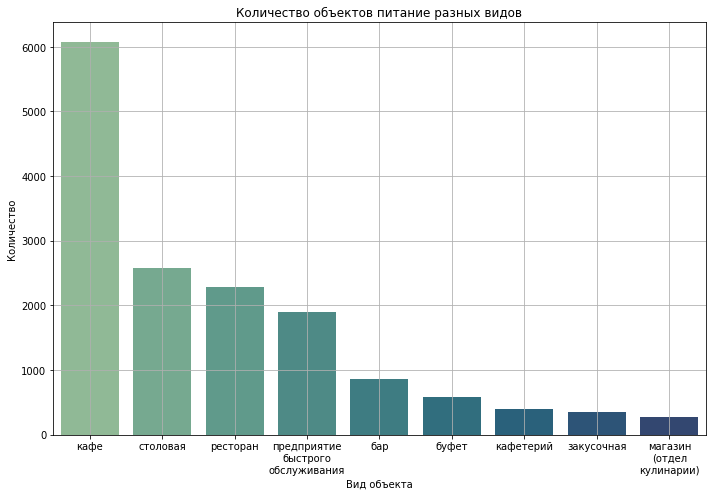

In [11]:
plt.figure(figsize = (10,7))

ax = sns.barplot(x=rest_data.object_type.value_counts().index, 
                y=rest_data.object_type.value_counts(),
                palette="crest")

ax.grid()
plt.ylabel("Количество")
plt.xticks([0, 1, 2,3,4,5,6,7,8],['кафе', 'столовая', 'ресторан', 'предприятие\nбыстрого\nобслуживания',
       'бар', 'буфет', 'кафетерий', 'закусочная', 'магазин\n(отдел\nкулинарии)'])

plt.xlabel('Вид объекта')
plt.title('Количество объектов питание разных видов')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=-15,ha="left",rotation_mode='anchor')
plt.tight_layout()


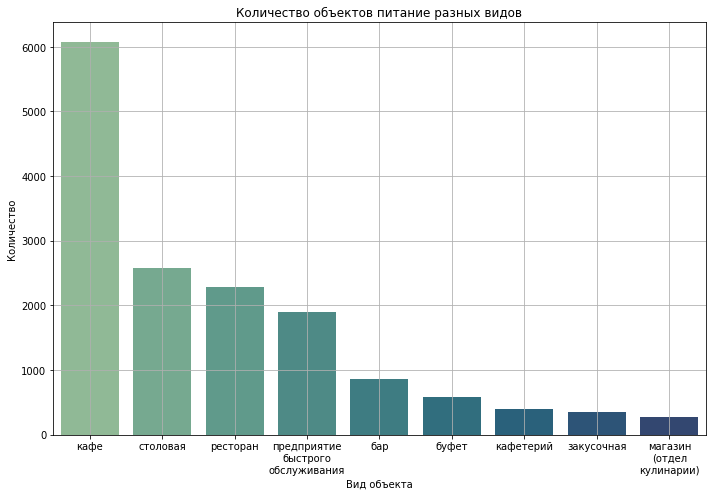

In [43]:
# Код ревьюера

plt.figure(figsize = (10,7))

ax = sns.barplot(x=rest_data.object_type.value_counts().index, 
                y=rest_data.object_type.value_counts(),
                palette="crest")

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels])

ax.grid()

plt.ylabel("Количество")
plt.xlabel('Вид объекта')

plt.title('Количество объектов питание разных видов')
plt.tight_layout()


Видим, что из всех видов объектов общественного питания преобладают кафе, далее идут столовые, рестораны и предприятия быстрого обслуживания

#### Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.


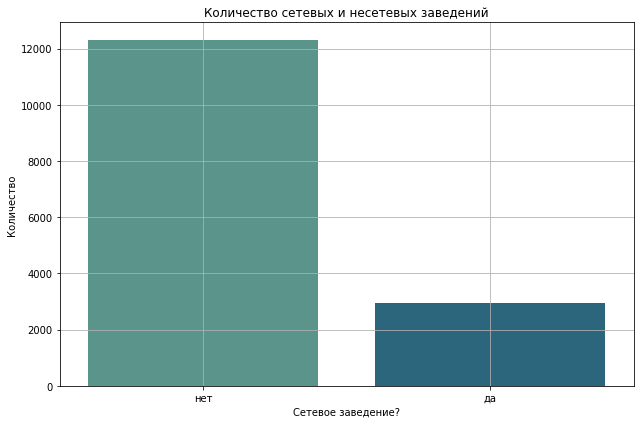

In [13]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x=rest_data.chain.value_counts().index, 
                y=rest_data.chain.value_counts(),
                palette="crest",
                )

ax.grid()
plt.ylabel("Количество")
plt.xlabel('Сетевое заведение?')
plt.title('Количество сетевых и несетевых заведений')
plt.tight_layout()


Несетевых заведений существенно больше чем сетевых


#### Для какого вида объекта общественного питания характерно сетевое распространение?

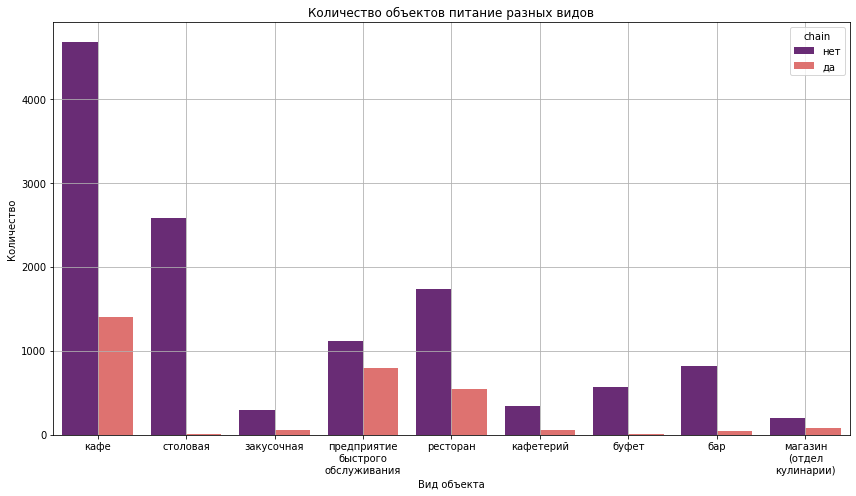

In [14]:
plt.figure(figsize = (12,7))

ax = sns.countplot(x = 'object_type', hue = 'chain', data = rest_data, palette = 'magma')

ax.grid()
plt.ylabel("Количество")
plt.xlabel('Вид объекта')
plt.title('Количество объектов питание разных видов')
plt.xticks([0, 1, 2,3,4,5,6,7,8],['кафе', 'столовая', 'закусочная', 'предприятие\nбыстрого\nобслуживания',
       'ресторан', 'кафетерий', 'буфет', 'бар', 'магазин\n(отдел\nкулинарии)'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=-15,ha="left",rotation_mode='anchor')
plt.tight_layout()


Для всех видов объектов общественного питания больше характерно несетевое распространение. Большая доля сетевых заведений наблюдается у предприятий быстрого обслуживания. Наименьшая доля - у столовых.

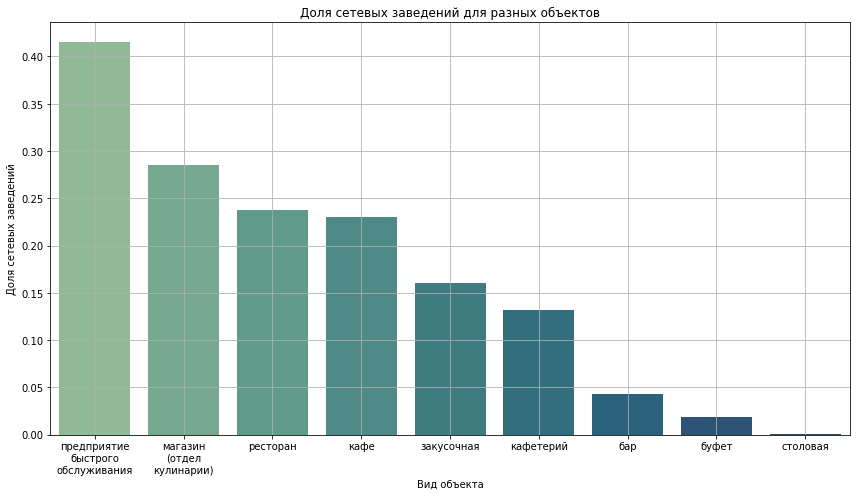

In [15]:
plt.figure(figsize = (12,7))


chain_proportion = rest_data.query('chain == "да"').groupby('object_type').id.count()\
    /rest_data.groupby('object_type').id.count()

ax = sns.barplot(x=chain_proportion.sort_values(ascending=False).index,
                 y=chain_proportion.sort_values(ascending=False).values, 
                 palette = 'crest')

ax.grid()
plt.ylabel("Доля сетевых заведений")
plt.xlabel('Вид объекта')
plt.title('Доля сетевых заведений для разных объектов')
plt.xticks([0, 1, 2,3,4,5,6,7,8],['предприятие\nбыстрого\nобслуживания', 'магазин\n(отдел\nкулинарии)',
       'ресторан', 'кафе', 'закусочная', 'кафетерий', 'бар', 'буфет',
       'столовая'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=-15,ha="left",rotation_mode='anchor')
plt.tight_layout()

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?



In [16]:
to_scatter = rest_data.query('chain == "да"').object_name.value_counts().to_frame().join(
    rest_data.groupby('object_name').number.mean()).join(
        rest_data[['object_name','chain']].drop_duplicates().set_index('object_name'))

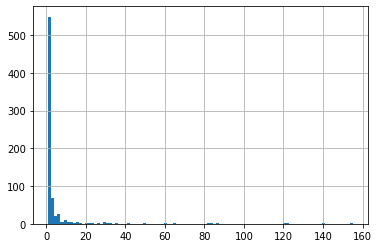

In [17]:
# дя сетевых заведений посчитаем количество заведений каждого object_name и построим гистограмму 
rest_data.query('chain == "да"').object_name.value_counts().hist(bins=100);

In [18]:
# также посмотрим статистику методом describe
rest_data.query('chain == "да"').object_name.value_counts().describe()

count    724.000000
mean       4.093923
std       12.601654
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      155.000000
Name: object_name, dtype: float64

75% сетевых заведений имеют в своей сети не более двух ресторанов

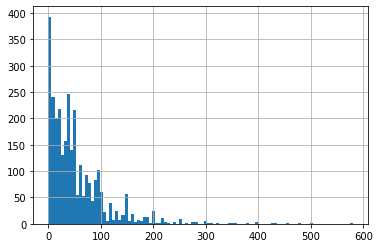

In [19]:
# гистограмма количетсва посадочных мест для сетевых заведений 
rest_data.query('chain == "да"').number.hist(bins=100);

In [20]:
rest_data.query('chain == "да"').number.describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

50% сетевых заведений имеют более 40 посадочных мест

Основываясь на имеющемся наборе данных, можно заключить, что для сетевых заведений характерно малое количество заведений с большим количеством посадочных мест. (Хотя кажется, что должно быть наоборот)

Будем считать, что все, что меньше квантили 75 - немного, все что выше квантили 75 - много.

In [21]:
frame_to_group = rest_data.query('chain == "да"').groupby('object_name').agg({'number':['count','mean']})
frame_to_group.columns = ['count','mean']
# Отбросим сети, состоящие из 1 заведения
frame_to_group = frame_to_group.query('count!=1')

In [22]:
frame_to_group['mean'].describe()

count    274.000000
mean      57.743796
std       48.462715
min        0.000000
25%       20.083333
50%       44.791530
75%       83.104167
max      245.000000
Name: mean, dtype: float64

Таким образом, для количества посадочных мест положим: если меньше 80 - немного, если больше 80 - много


In [23]:
frame_to_group['count'].describe()

count    274.000000
mean       9.175182
std       19.464591
min        2.000000
25%        2.000000
50%        3.000000
75%        7.000000
max      155.000000
Name: count, dtype: float64

Для количества заведений положим: если меньше либо равно 7 - немного, если больше 7 - много

In [24]:
# сгруппируем данные с учетом условий, определенных выше
frame_to_group.loc[((frame_to_group['count']<=7) & 
                    (frame_to_group['mean']>80)),'group'] = 'Много мест, немного заведений'

frame_to_group.loc[((frame_to_group['count']<=7) & 
                    (frame_to_group['mean']<=80)),'group'] = 'Немного мест, немного заведений'

frame_to_group.loc[((frame_to_group['count']>7) & 
                    (frame_to_group['mean']>80)),'group'] = 'Много мест, много заведений'

frame_to_group.loc[((frame_to_group['count']>7) & 
                    (frame_to_group['mean']<=80)),'group'] = 'Немного мест, много заведений'

In [25]:
frame_to_group['group'].value_counts()

Немного мест, немного заведений    156
Много мест, немного заведений       59
Немного мест, много заведений       44
Много мест, много заведений         15
Name: group, dtype: int64

In [45]:
# Код ревьюера

pd.cut(frame_to_group['count'], bins=[1,3,6,155], labels=['мало заведений', 'среднее число заведений', 'много заведений'])
# аналогично можно сделать для `mean`, а потом объединить столбы

object_name
Bocconcino                     мало заведений
Burger Club                    мало заведений
COFIX                          мало заведений
Coffeeshop Company    среднее число заведений
Cofix                         много заведений
                               ...           
Шоколадница                   много заведений
Штолле                        много заведений
ЯКИТОРИЯ              среднее число заведений
Якитория                      много заведений
кафе «Старбакс»                мало заведений
Name: count, Length: 274, dtype: category
Categories (3, object): ['мало заведений' < 'среднее число заведений' < 'много заведений']

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?

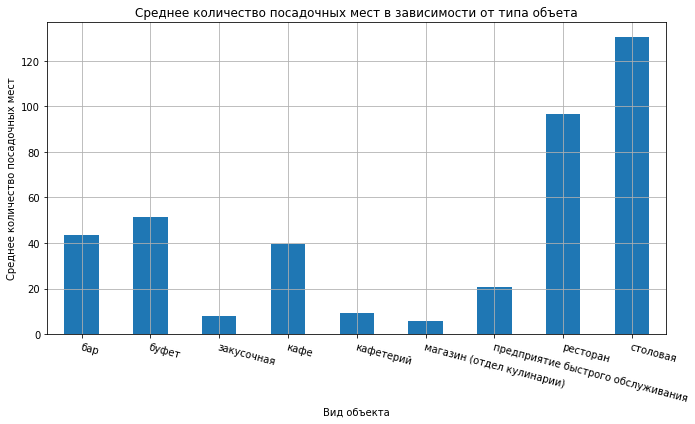

In [26]:
mean_n_on_type = rest_data.groupby('object_type').number.mean()

plt.figure(figsize = (10,6))
ax = mean_n_on_type.plot(kind='bar')
ax.grid()
plt.ylabel("Среднее количество посадочных мест")
plt.xlabel('Вид объекта')
plt.title('Среднее количество посадочных мест в зависимости от типа объета')
ax.set_xticklabels(ax.get_xticklabels(),rotation=-15,ha="left",rotation_mode='anchor')
plt.tight_layout()


Видим, что самое большое количетсво посадочных мест наблюдается для заведений типа  "столовая".

#### Выделим в отдельный столбец информацию об улице из столбца address

In [27]:
# воспользуемся методом split
rest_data = rest_data.join(rest_data.address.str.split(',',expand=True)[1]).rename({1:'street'},axis=1).copy()

#### Построим график топ-10 улиц по количеству объектов общественного питания.

In [28]:
# напишем функцию, возвращающую улицу по столбцу с адресом
def get_street(data):
    split = data['address'].split(', ', maxsplit=-1)
    if  len(split) > 2 and ("улица" in split[1] or "шоссе" in split[1] or "переулок" in split[1] 
        or 'бульвар' in split[1] or 'проспект' in split[1] or 'набережная' in split[1]
        or 'площадь' in split[1] or 'тупик' in split[1] or 'аллея' in split[1] or 'тоннель' in split[1] or 'линия' in split[1] or 'путепровод' in split[1]):
        return split[1]
        
    elif len(split) > 2 and ("улица" in split[2] or "шоссе" in split[2] or "переулок" in split[2]  
        or 'бульвар' in split[2] or 'проспект' in split[2] or 'набережная' in split[2]
        or 'площадь' in split[2] or 'тупик' in split[2] or 'аллея' in split[2] or 'тоннель' in split[2] or 'линия' in split[2] or 'путепровод' in split[2]):
        return split[2]

In [29]:
rest_data['street']=rest_data.apply(get_street, axis=1)

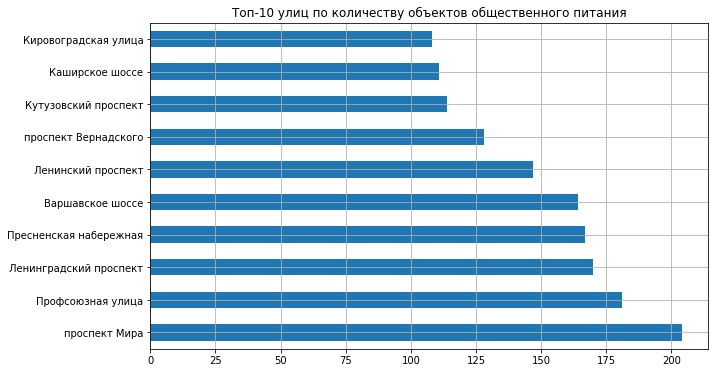

In [30]:
plt.figure(figsize = (10,6))
plt.title('Топ-10 улиц по количеству объектов общественного питания')

ax=rest_data.street.value_counts().head(10).plot(kind='barh')
ax.grid()

In [31]:
# создадим список из топ-10 улиц
top10_streets  = rest_data.street.value_counts().head(10).index.to_list()

Подключим к проекту внешние файлы (с ресурса data.mos.ru), содержащие информацию об улицах и районах Москвы

In [32]:
from io import BytesIO
import requests
spreadsheet_id = '1SfVXAmmSu8PSAoffW1n_50oyfiqKwajtRHFg2TqzEFI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_1 = pd.read_csv(BytesIO(r.content))

spreadsheet_id = '1-GNt78gX__aDONOS9NuZmhtiWr2nefos7PHr7Sne2u8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_2 = pd.read_csv(BytesIO(r.content))

Дообработаем внешние файлы

In [33]:
# оставим только необходимую информацию из файлов
df_2 = df_2[['Kod','Name']]
df_1 = df_1[['Полное наименование','Код ОМК ТЕ']]
df_1 = df_1.rename({'Код ОМК ТЕ':'code','Полное наименование':'street'},axis=1)
df_2 = df_2.rename({'Kod':'code','Name':'district'},axis=1)

# разделим столбец с кодами районов на части
df_1 = df_1.join(df_1.code.str.split(';',expand=True))
df_1 = df_1.drop(columns='code')
df_1.columns = [ 'street',  'code_0', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5','code_6','code_7','code_8' ]

# приведем к Int64
df_2.code = df_2.code.astype('Int64')

In [34]:
df_1.duplicated().sum()

208

In [35]:
df_2.duplicated().sum()

0

In [36]:
df_1.drop_duplicates(inplace=True)

In [37]:
# смерджим файлы по коду района
for code in ['code_0', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5','code_6','code_7','code_8']:
# приведем столбцы с кодом к типу Int64
    df_1[code] = df_1[code].str.lstrip('0')
    df_1.fillna(0,inplace=True)
    df_1[code] = df_1[code].astype('int')
# смерджим файлы 
    df_1 = df_1.merge(df_2, how='left', left_on=code, right_on='code')

# удалим ненужное из смерджинного датасета
df_1 = df_1.drop(columns= ['code_0', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5','code_6', 
                           'code_7', 'code_8', 'code_x', 'code_y','code_x', 'code_y','code'])

# выведем из полученной таблице улицы, который вошли в список топ-10
df_1.query('street.isin(@top10_streets)')

,street,district_x,district_y,district_x,district_y,district_x,district_y,district_x,district_y,district
97,Каширское шоссе,район Москворечье-Сабурово,район Нагатино-Садовники,район Орехово-Борисово Северное,район Орехово-Борисово Южное,0,0,0,0,NaN
113,Кировоградская улица,район Чертаново Северное,район Чертаново Центральное,район Чертаново Южное,0,0,0,0,0,NaN
408,Кутузовский проспект,район Дорогомилово,район Фили-Давыдково,0,0,0,0,0,0,NaN
443,Ленинградский проспект,район Аэропорт,район Беговой,район Сокол,Хорошёвский район,0,0,0,0,NaN
449,Ленинский проспект,район Якиманка,Донской район,Гагаринский район,Ломоносовский район,Обручевский район,район Тёплый Стан,район Проспект Вернадского,район Тропарёво-Никулино,NaN
688,проспект Мира,Мещанский район,Алексеевский район,район Марьина Роща,Останкинский район,район Ростокино,район Свиблово,Ярославский район,0,NaN
1340,Пресненская набережная,Пресненский район,0,0,0,0,0,0,0,NaN
1386,Профсоюзная улица,Академический район,район Коньково,Обручевский район,район Тёплый Стан,район Черёмушки,район Ясенево,0,0,NaN
4134,Варшавское шоссе,Донской район,район Нагатино-Садовники,Нагорный район,район Чертаново Северное,район Чертаново Центральное,район Чертаново Южное,район Северное Бутово,район Южное Бутово,поселение Щербинка
4159,проспект Вернадского,Гагаринский район,Ломоносовский район,район Проспект Вернадского,район Раменки,район Тропарёво-Никулино,0,0,0,NaN


In [38]:
# создадим множество из районов, в которых находятся топ-10 улиц
top10_dist_set = set(np.concatenate(df_1.query('street.isin(@top10_streets)').iloc[:,1::].values))
top10_dist_set.remove(np.nan)
top10_dist_set.remove(0)
print("Районы, в которых находятся топ-10 улиц по количеству объектов общественного питания:\n", top10_dist_set)

Районы, в которых находятся топ-10 улиц по количеству объектов общественного питания:
 {'район Ясенево', 'район Ростокино', 'район Чертаново Центральное', 'Ломоносовский район', 'район Южное Бутово', 'Мещанский район', 'район Проспект Вернадского', 'район Якиманка', 'Донской район', 'Гагаринский район', 'район Черёмушки', 'район Марьина Роща', 'район Аэропорт', 'район Орехово-Борисово Северное', 'район Беговой', 'район Коньково', 'Пресненский район', 'район Тропарёво-Никулино', 'район Сокол', 'район Чертаново Северное', 'Останкинский район', 'район Тёплый Стан', 'район Северное Бутово', 'район Орехово-Борисово Южное', 'район Дорогомилово', 'поселение Щербинка', 'Хорошёвский район', 'Обручевский район', 'район Свиблово', 'район Чертаново Южное', 'Алексеевский район', 'Нагорный район', 'район Москворечье-Сабурово', 'район Раменки', 'Академический район', 'район Нагатино-Садовники', 'Ярославский район', 'район Фили-Давыдково'}


In [39]:
# Код ревьюера

df_streets = pd.read_csv('https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format('1SfVXAmmSu8PSAoffW1n_50oyfiqKwajtRHFg2TqzEFI'))

df_codes = pd.read_csv('https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format('1-GNt78gX__aDONOS9NuZmhtiWr2nefos7PHr7Sne2u8'))

df_streets = df_streets[['Полное наименование', 'Код ОМК ТЕ']]
df_streets.columns = ['street','code']
df_streets['code'] = df_streets['code'].str.split(';')
df_streets = df_streets.explode('code')
df_streets['code'] = df_streets['code'].str.lstrip('0').astype('int')
districts = df_streets.merge(df_codes, left_on='code', right_on='Kod')

with pd.option_context('display.max_colwidth', None):
    display(districts[districts['street'].isin(top10_streets)].groupby('street').agg({'Name' : 'unique'}))

,Name
street,
Варшавское шоссе,"[район Южное Бутово, Донской район, Нагорный район, район Нагатино-Садовники, район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное, район Северное Бутово, поселение Щербинка]"
Каширское шоссе,"[район Москворечье-Сабурово, район Нагатино-Садовники, район Орехово-Борисово Северное, район Орехово-Борисово Южное]"
Кировоградская улица,"[район Чертаново Северное, район Чертаново Центральное, район Чертаново Южное]"
Кутузовский проспект,"[район Фили-Давыдково, район Дорогомилово]"
Ленинградский проспект,"[район Сокол, район Аэропорт, Хорошёвский район, район Беговой]"
Ленинский проспект,"[район Якиманка, Донской район, Гагаринский район, Обручевский район, район Проспект Вернадского, район Тропарёво-Никулино, Ломоносовский район, район Тёплый Стан]"
Пресненская набережная,[Пресненский район]
Профсоюзная улица,"[район Коньково, район Ясенево, Академический район, район Черёмушки, Обручевский район, район Тёплый Стан]"
проспект Вернадского,"[Гагаринский район, район Раменки, район Проспект Вернадского, район Тропарёво-Никулино, Ломоносовский район]"


Здесь можно отметить, что большинство районов из списка относятся к Южному, Юго-западному и Западному округам Москвы

#### Найдем число улиц с одним объектом общественного питания.

In [40]:
one_object_streets = rest_data.groupby('street').id.count().to_frame().query('id == 1').index.to_list()
print("Число улиц с одним объектом общественного питания:", len(one_object_streets))

Число улиц с одним объектом общественного питания: 445


In [41]:
dist_set_one_obj = set(np.concatenate(df_1.query('street.isin(@one_object_streets)').iloc[:,1::].values))
dist_set_one_obj.remove(np.nan)
dist_set_one_obj.remove(0)
print("Районы, в которых находятся улицы с одним объектом общественного питания:\n", dist_set_one_obj)

Районы, в которых находятся улицы с одним объектом общественного питания:
 {'район Восточное Измайлово', 'Можайский район', 'район Ново-Переделкино', 'Мещанский район', 'район Новогиреево', 'Донской район', 'район Преображенское', 'район Марьина Роща', 'район Западное Дегунино', 'Пресненский район', 'Бескудниковский район', 'район Старое Крюково', 'район Капотня', 'район Котловка', 'район Южное Тушино', 'район Косино-Ухтомский', 'район Богородское', 'район Марфино', 'район Северное Медведково', 'поселение Щаповское', 'район Выхино-Жулебино', 'Молжаниновский район', 'район Савёлки', 'район Москворечье-Сабурово', 'поселение Воскресенское', 'поселение Киевский', 'район Зюзино', 'Южнопортовый район', 'район Митино', 'Войковский район', 'район Очаково-Матвеевское', 'район Ясенево', 'район Метрогородок', 'поселение Кокошкино', 'Басманный район', 'район Люблино', 'район Арбат', 'район Черёмушки', 'район Восточный', 'поселение Кленовское', 'район Северный', 'Останкинский район', 'район Северно

## Выводы:
- Из всех видов объектов общественного питания преобладают кафе, далее идут столовые, рестораны и предприятия быстрого обслуживания
- Несетевые заведения преобладают
- Для всех видов объектов общественного питания больше характерно несетевое распространение. Большая доля сетевых заведений наблюдается у предприятий быстрого обслуживания. Наименьшая доля - у столовых.
- Основываясь на имеющемся наборе данных, можно заключить, что для сетевых заведений характерно малое количество заведений с большим количеством посадочных мест. 
- Самое большое количетсво посадочных мест наблюдается для заведений типа  "столовая".
- Топ-10 улиц по количеству объектов общественного питания: 'проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Пресненская набережная', 'Варшавское шоссе', 'Ленинский проспект', 'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе', 'Кировоградская улица'. С использованием внешнего источника данных Был сформирован список из районов, к которым отноятся указанные улицы. Большинство районов из списка относятся к Южному, Юго-западному и Западному округам Москвы
- Число улиц с одним объектом общественного питания: 445. С использованием внешнего источника данных Был сформирован список из районов, к которым отноятся улицв с одним объектом общественного питания.

## Рекомендации:
С точки зрения рекомендаций, можно сформировать две стратегии для открытия кафе:

1. С одной стороны, кафе следует открывть в районах, где мало конкуренции (см. список районов, в которых находятся улицы с одним объектом общественного питания). Однако, в таком случае имеется риск низкого спроса ввиду отсутсвия спроса.
 
2. С другой стороны, кафе следует открывать в районах, где имеется много заведений (см. список районов, в которых находятся топ-10 улиц по количеству объектов общественного питания), в таком случае снижается риск отсутствия спроса. Однако при такой стратегии повышается риск конкуренции.

Презентация: <https://drive.google.com/file/d/1oTTJ-JclODXUZuREfeeiLzoc4__zOQiU/view?usp=sharing>
